# Analysis on time series data
Author : Francis Fan <br>
Date 04/05/2020


# Overview

As the volumn of data explosively grows in modern society, people are becoming more incapable of handling these data themselves. Instead, people developed a bunch of useful tools on computer to help them understand the different data. One of the most prevalent data type people use to analyze the daily circumstances is Time series data type. This type of data usually have underlying patterns based on time. Today, we are going to use two different models that can manipute time series data and make prediction with them. We will perform an EDA first to see the overall picture of the data set of sea_ice. 

# Data
    The dataset "sea_ice" is coming from https://timeseries.weebly.com/data-sets.html which provides several data sets for people to understand time series data. It includes 255 records of different time stamps and their 2 different features, "Arctic  Antarctica" respectively. It is different from datasets we dealt with before because it fully depends on the time series. Therefore, we will need to use time seires methods like ARIMA and Holt-Winters Method to analyze time series data

First, we need to load the library and data

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels
import warnings 
warnings.filterwarnings("ignore")

from statsmodels.tsa.api import ExponentialSmoothing

# loading data
df = pd.read_csv("sea_ice.csv")


# Exploratory Data Analysis 

Since we are trying to understand the hidden pattern under the sea_ice dataset, it is quite helpful for us to take a EDA on the dataset and have a good look of what might be going on. 

The first thing to look at is the dimensions of the dataset

In [2]:
df.shape

(255, 3)

This dataset has 440 records of sea_ice information. Each record has 3 elements, 1 time data and 2 ice data.

Check whether there is null values in the dataset

In [3]:
df.isnull().values.any()

False

This dataset turns out to be quite clean without any missing value. I guess it is preprocessed by professional people and then uploaded. 

Summary for numeric independent variables

In [4]:
df.describe()

,Arctic,Antarctica
count,255.000000,255.000000
mean,9.362510,8.665647
std,3.222151,4.594490
min,2.780000,1.300000
25%,6.365000,3.800000
50%,10.100000,8.510000
75%,12.320000,13.160000
max,13.710000,15.290000


Build a scatter plot of arctic against time with only the first 30 data 

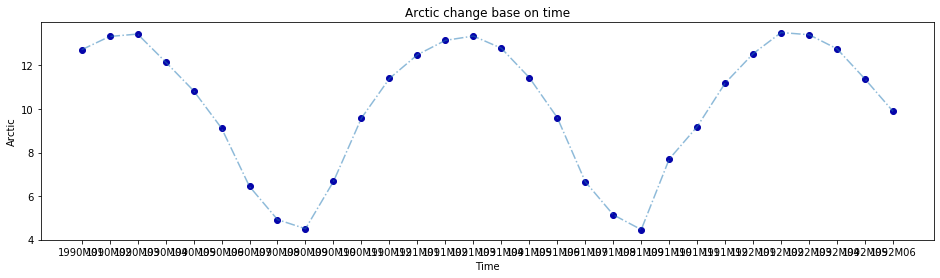

In [5]:
plt.figure(figsize=(16,4))
plt.scatter(x=df.Time[:30], y=df.Arctic[:30], color = '#0504aa')
plt.plot(df.Time[:30], df.Arctic[:30], linestyle="-.", alpha=.5)
# plt.grid(axis='y', alpha=2)
plt.xlabel('Time')
plt.ylabel('Arctic')
plt.title('Arctic change base on time')
plt.show()

Build a scatter plot of Antarctica against time with only the first 30 data 

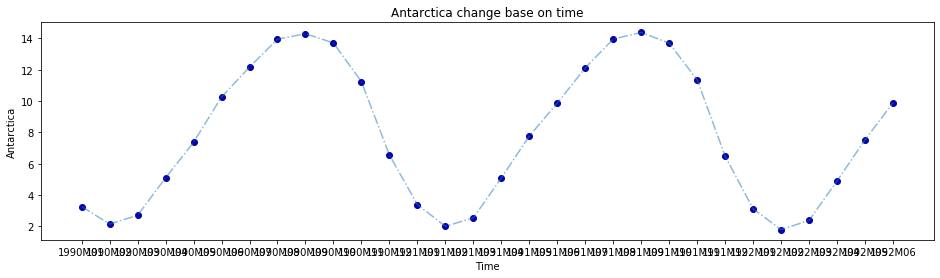

In [6]:
plt.figure(figsize=(16,4))
plt.scatter(x=df.Time[:30], y=df.Antarctica[:30], color = '#0504aa')
plt.plot(df.Time[:30], df.Antarctica[:30], linestyle="-.", alpha=.5)
# plt.grid(axis='y', alpha=2)
plt.xlabel('Time')
plt.ylabel('Antarctica')
plt.title('Antarctica change base on time')
plt.show()

Put these two graphs together

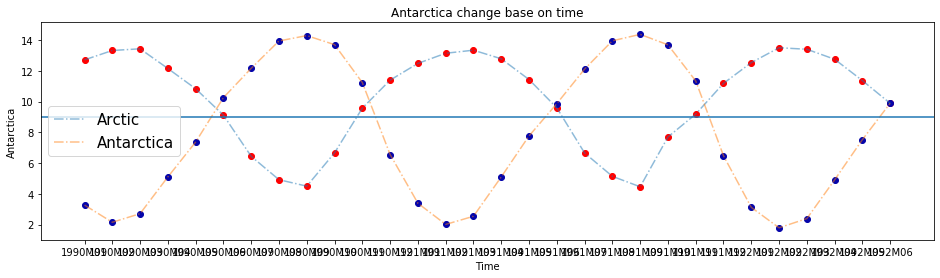

In [7]:
fig = plt.figure(figsize=(16,4))
plt.scatter(x=df.Time[:30], y=df.Arctic[:30], color = 'red')
plt.plot(df.Time[:30], df.Arctic[:30], linestyle="-.", alpha=.5)
# plt.grid(axis='y', alpha=2)
plt.xlabel('Time')
plt.ylabel('Arctic')
plt.title('Arctic change base on time')

plt.scatter(x=df.Time[:30], y=df.Antarctica[:30], color = '#0504aa')
plt.plot(df.Time[:30], df.Antarctica[:30], linestyle="-.", alpha=.5)
# plt.grid(axis='y', alpha=2)
plt.xlabel('Time')
plt.ylabel('Antarctica')
plt.title('Antarctica change base on time')

plt.axhline(9)
plt.legend(["Arctic", "Antarctica"], fontsize=15)
plt.show()

We can see that both arctic and antarctica seasonal because when arctic gets summer, there will be less ice and it will be winter for antarctica with more ice. Vise versa for arctic winter. Also, we can tell from the graph that both of these data are not stationary because they have constant mean, constant standard deviation but not seasonality. 

For this problem, we are only going to consider Arctic

In [47]:
df_a = df[["Time", "Arctic"]]

Then, we need to plot the ACF and PACF plots and therefore decide the order of ARIMA

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 864x576 with 0 Axes>

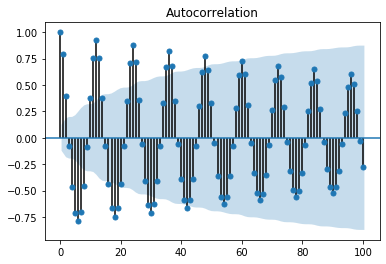

In [48]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(df_a.Arctic.diff().dropna(), lags=100)
plt.plot

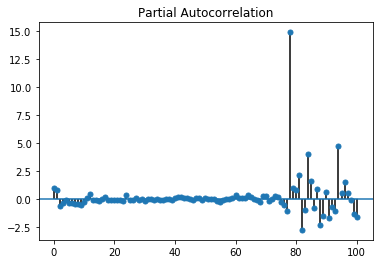

In [66]:
fig = sm.graphics.tsa.plot_pacf(df_a.Arctic.diff().dropna(), lags=100)
plt.show()

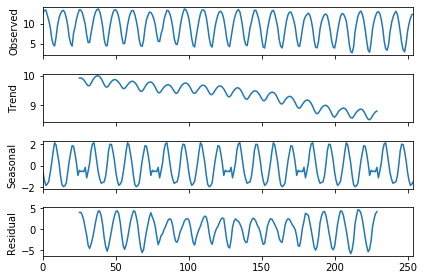

In [65]:
result = statsmodels.tsa.seasonal.seasonal_decompose(df_a.Arctic, model='additive', freq=50)
result.plot()
pass

# Models
    The next step is to understand the dataset is to build some models and put the data in so that we can have a look about how can a computer interpret the data. For this assignment, I will use ARIMA and Holt-Winters Method to analyze time series data. 

## ARIMA

In [72]:
model = statsmodels.tsa.arima_model.ARIMA(df.Arctic, order=(26,2,21))
model_fit = model.fit()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

## Holt-Winters Method

In [75]:
holt = ExponentialSmoothing(df.Arctic, seasonal_periods=4, trend='add', seasonal='add')
model = holt.fit()

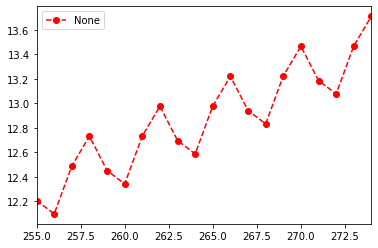

In [78]:
model.forecast(20).plot(style='--', marker='o', color='red', legend=True)

# Conclusion
I could not use the ARIMA function to work because the stange looking of acf and pacf, causing me having no idea how to decide q, d, p of order in ARIMA. However, the Holt-Winters Method is working well. The forecast of Holt-Winters Method indicate that although there is a seasonal trend in arctic ice thickness, it is getting thicker ever single year in prediction.